In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('Expresso_churn_dataset.csv')

In [3]:
df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           int64  
dtypes: float64(12), int64(2), object(5)
memory usage: 312.2+ MB


In [5]:
df.drop(['user_id'], axis=1, inplace=True)

In [6]:
df.dropna(inplace = True)

In [7]:
df

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
37,DAKAR,K > 24 month,10400.0,24.0,10900.0,3633.0,26.0,11815.0,12.0,59.0,3.0,0.0,1.0,NO,54,"Data:490F=1GB,7d",8.0,0
170,DAKAR,K > 24 month,3000.0,6.0,2999.0,1000.0,7.0,515.0,15.0,0.0,0.0,0.0,0.0,NO,58,"Data:490F=1GB,7d",5.0,0
561,THIES,K > 24 month,2750.0,6.0,2748.0,916.0,6.0,0.0,33.0,1.0,22.0,0.0,8.0,NO,39,Mixt 250F=Unlimited_call24H,1.0,0
635,DAKAR,K > 24 month,11700.0,21.0,12698.0,4233.0,33.0,2.0,170.0,249.0,15.0,6.0,3.0,NO,62,All-net 500F=2000F;5d,17.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2152712,DAKAR,K > 24 month,12100.0,28.0,11661.0,3887.0,25.0,0.0,204.0,218.0,36.0,0.0,1.0,NO,57,Jokko_Daily,8.0,0
2153142,MATAM,I 18-21 month,3000.0,12.0,2989.0,996.0,18.0,4590.0,3.0,48.0,6.0,0.0,0.0,NO,40,"Data:200F=Unlimited,24H",6.0,0
2153483,DAKAR,K > 24 month,12000.0,8.0,11539.0,3846.0,9.0,9179.0,1405.0,384.0,42.0,0.0,2.0,NO,61,MIXT: 200mnoff net _unl on net _5Go;30d,3.0,0
2153547,DAKAR,K > 24 month,14600.0,27.0,15599.0,5200.0,29.0,0.0,32.0,304.0,13.0,2.0,2.0,NO,52,All-net 500F=2000F;5d,28.0,0


In [9]:
cols = []

for col in df.columns:
    if df[col].dtype == 'object':
        cols.append(col)

In [10]:
cols

['REGION', 'TENURE', 'MRG', 'TOP_PACK']

In [12]:
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])
    print(le.classes_)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
[0 1 2 3 4 5 6 7]
[0]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67]


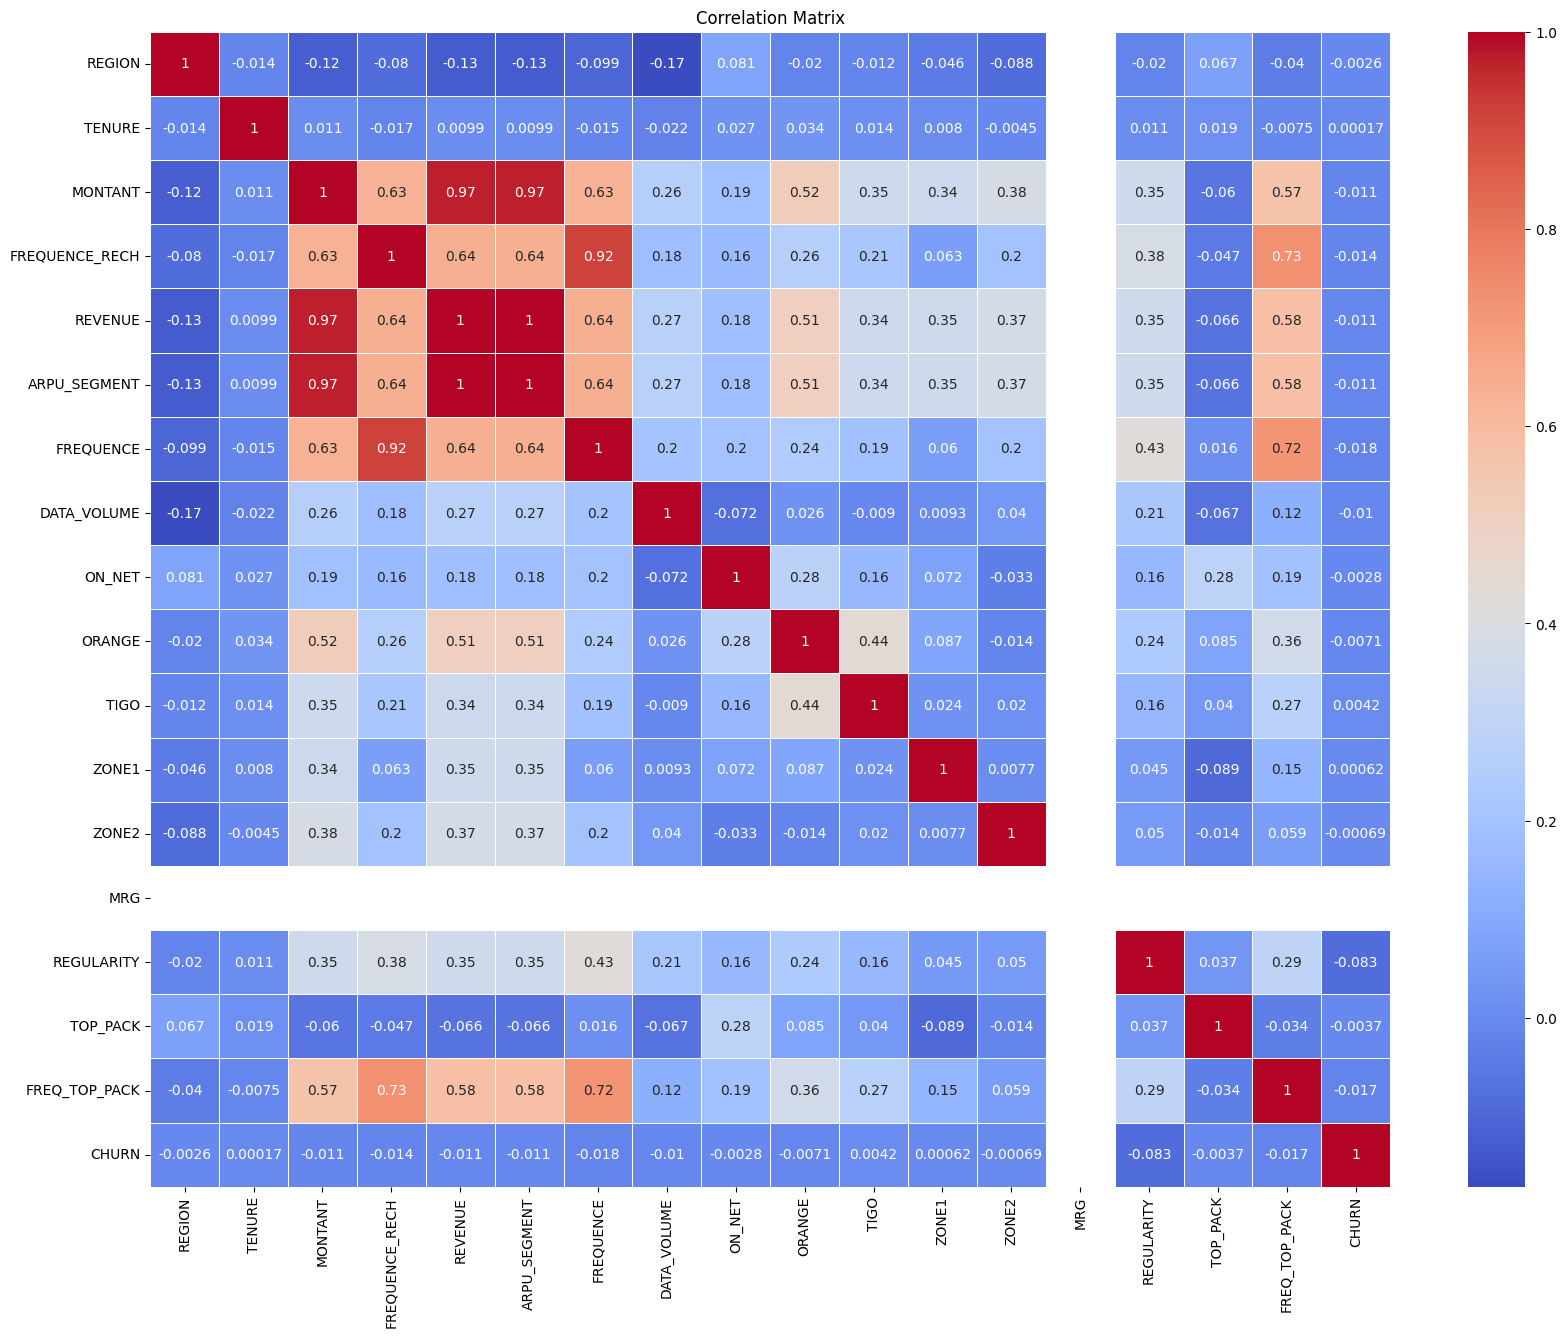

In [14]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [15]:
df.drop(['MRG', 'TOP_PACK'], axis=1, inplace=True)

In [23]:
df.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
0,7,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,54,8.0,0
37,7,10400.0,24.0,10900.0,3633.0,26.0,11815.0,12.0,59.0,3.0,0.0,1.0,54,8.0,0
170,7,3000.0,6.0,2999.0,1000.0,7.0,515.0,15.0,0.0,0.0,0.0,0.0,58,5.0,0
561,7,2750.0,6.0,2748.0,916.0,6.0,0.0,33.0,1.0,22.0,0.0,8.0,39,1.0,0
635,7,11700.0,21.0,12698.0,4233.0,33.0,2.0,170.0,249.0,15.0,6.0,3.0,62,17.0,0


In [17]:
df.drop(['REGION'], axis=1, inplace=True)

In [19]:
count = Counter(df['CHURN'])
count

Counter({0: 10823, 1: 16})

In [29]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [30]:
df

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
0,7,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,54,8.0,0
37,7,10400.0,24.0,10900.0,3633.0,26.0,11815.0,12.0,59.0,3.0,0.0,1.0,54,8.0,0
170,7,3000.0,6.0,2999.0,1000.0,7.0,515.0,15.0,0.0,0.0,0.0,0.0,58,5.0,0
561,7,2750.0,6.0,2748.0,916.0,6.0,0.0,33.0,1.0,22.0,0.0,8.0,39,1.0,0
635,7,11700.0,21.0,12698.0,4233.0,33.0,2.0,170.0,249.0,15.0,6.0,3.0,62,17.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2152712,7,12100.0,28.0,11661.0,3887.0,25.0,0.0,204.0,218.0,36.0,0.0,1.0,57,8.0,0
2153142,5,3000.0,12.0,2989.0,996.0,18.0,4590.0,3.0,48.0,6.0,0.0,0.0,40,6.0,0
2153483,7,12000.0,8.0,11539.0,3846.0,9.0,9179.0,1405.0,384.0,42.0,0.0,2.0,61,3.0,0
2153547,7,14600.0,27.0,15599.0,5200.0,29.0,0.0,32.0,304.0,13.0,2.0,2.0,52,28.0,0


In [31]:
X = df.drop(['CHURN'], axis=1)
y = df['CHURN']

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, precision_score

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [36]:
ros=RandomOverSampler()

In [39]:
X_ros, y_ros = ros.fit_resample(X_train, y_train)

In [40]:
X = X_ros
y = y_ros

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [43]:
count = Counter(y_train)
count

Counter({1: 6937, 0: 6919})

In [44]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [45]:
model.score(X_test, y_test)

0.9994226327944573

In [48]:
y_pred = model.predict(X_test)

In [49]:
acc = accuracy_score(y_test, y_pred)
acc

0.9994226327944573

In [50]:
import joblib

In [52]:
joblib.dump(model, 'STM.joblib')

['STM.joblib']

In [53]:
joblib.dump(le, 'STM_le.joblib')

['STM_le.joblib']

In [55]:
df.columns

Index(['TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT',
       'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1',
       'ZONE2', 'REGULARITY', 'FREQ_TOP_PACK', 'CHURN'],
      dtype='object')

In [82]:
df.FREQ_TOP_PACK.max()

np.float64(560.0)

In [83]:
cols

['REGION', 'TENURE', 'MRG', 'TOP_PACK']

In [84]:
dfc = df[df['CHURN'] == 1]

In [85]:
dfc

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
331174,7,1650.0,6.0,1139.0,380.0,10.0,255.0,8.0,0.0,0.0,0.0,0.0,26,1.0,1
617522,7,4850.0,10.0,5085.0,1695.0,17.0,6215.0,5.0,4.0,1.0,0.0,2.0,36,6.0,1
818634,7,7000.0,15.0,7640.0,2547.0,29.0,0.0,26.0,48.0,2.0,0.0,0.0,44,1.0,1
971494,7,5450.0,22.0,5810.0,1937.0,28.0,1110.0,11.0,7.0,4.0,1.0,3.0,21,3.0,1
1029755,7,8250.0,3.0,8349.0,2783.0,4.0,8269.0,717.0,750.0,119.0,4.0,1.0,32,1.0,1
1047610,7,4000.0,6.0,4001.0,1334.0,11.0,0.0,3.0,47.0,0.0,3.0,4.0,10,1.0,1
1187447,7,16650.0,39.0,16648.0,5549.0,39.0,163.0,2128.0,207.0,224.0,1.0,4.0,56,19.0,1
1194676,7,4500.0,8.0,4728.0,1576.0,9.0,0.0,53.0,142.0,5.0,1.0,1.0,22,7.0,1
1210827,7,62650.0,61.0,62232.0,20744.0,53.0,32351.0,3.0,35.0,1.0,129.0,122.0,55,8.0,1
1341941,7,12000.0,20.0,11699.0,3900.0,21.0,0.0,585.0,70.0,8.0,22.0,0.0,35,13.0,1
